In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [5]:
df = pd.read_csv("breast-cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df.shape

(569, 32)

Let's see description of data

In [8]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [10]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

Let't see how balanced classes are

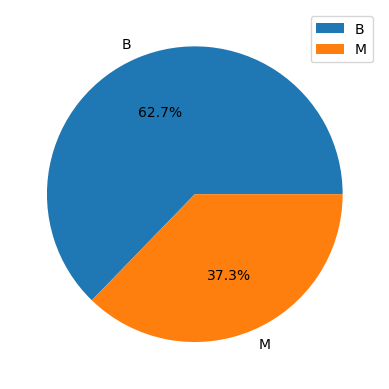

In [12]:
d = df.diagnosis.value_counts()
plt.pie(d, labels=['B','M'], autopct = '%1.1f%%')
plt.legend()

We see that classes aren't balanced

Let's see distributions

In [15]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [16]:
df.duplicated().sum()

0

Let's see distributions for each class (B, M)

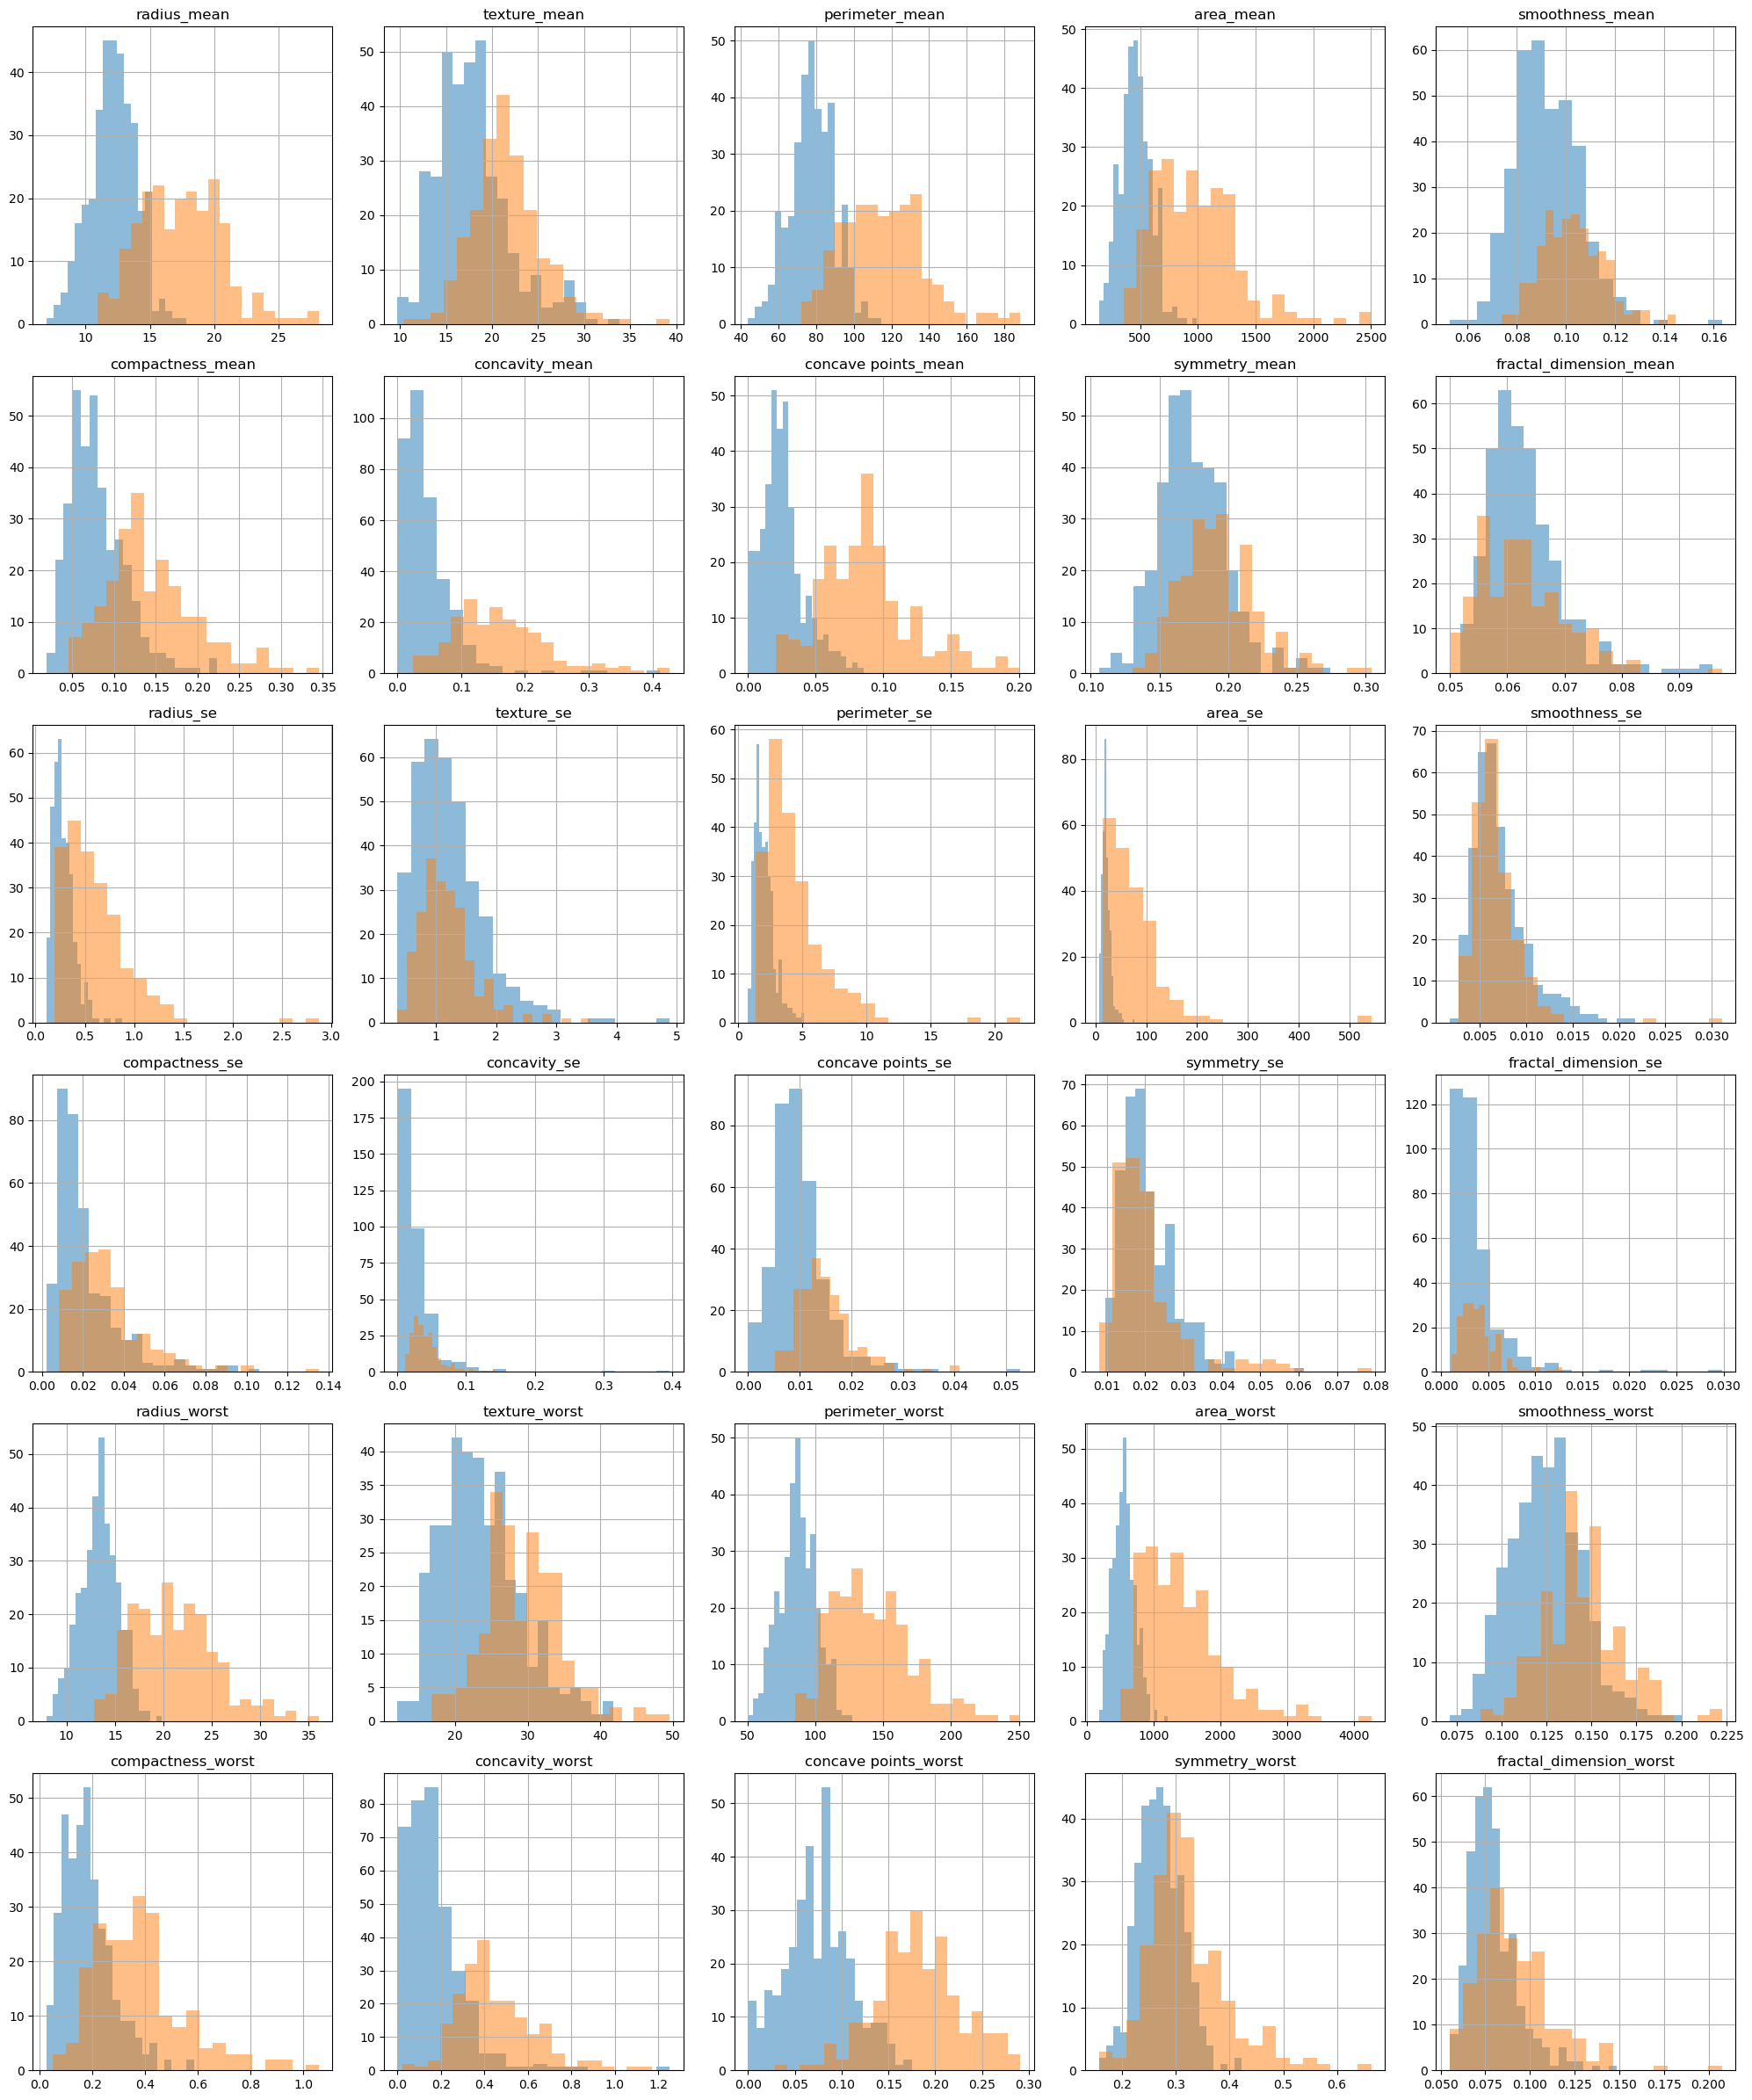

In [19]:
fig, axes = plt.subplots(6, 5, figsize=(20,24))
axes = axes.flatten()

plot_columns = df.columns.drop(['id','diagnosis'])

for i, col in enumerate(plot_columns):
    ax = axes[i]
    for label, group in df.groupby('diagnosis'):
        group[col].hist(ax = ax, alpha=0.5, bins=20, label=label)
    ax.set_title(col)


plt.tight_layout()
plt.show()

Let's drop id column, and set output column as numerical 

In [21]:
df.drop('id', axis=1, inplace=True)

In [22]:
df.diagnosis = df['diagnosis'].map({'B' : 0, 'M' : 1})

In [23]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Let's see correlations

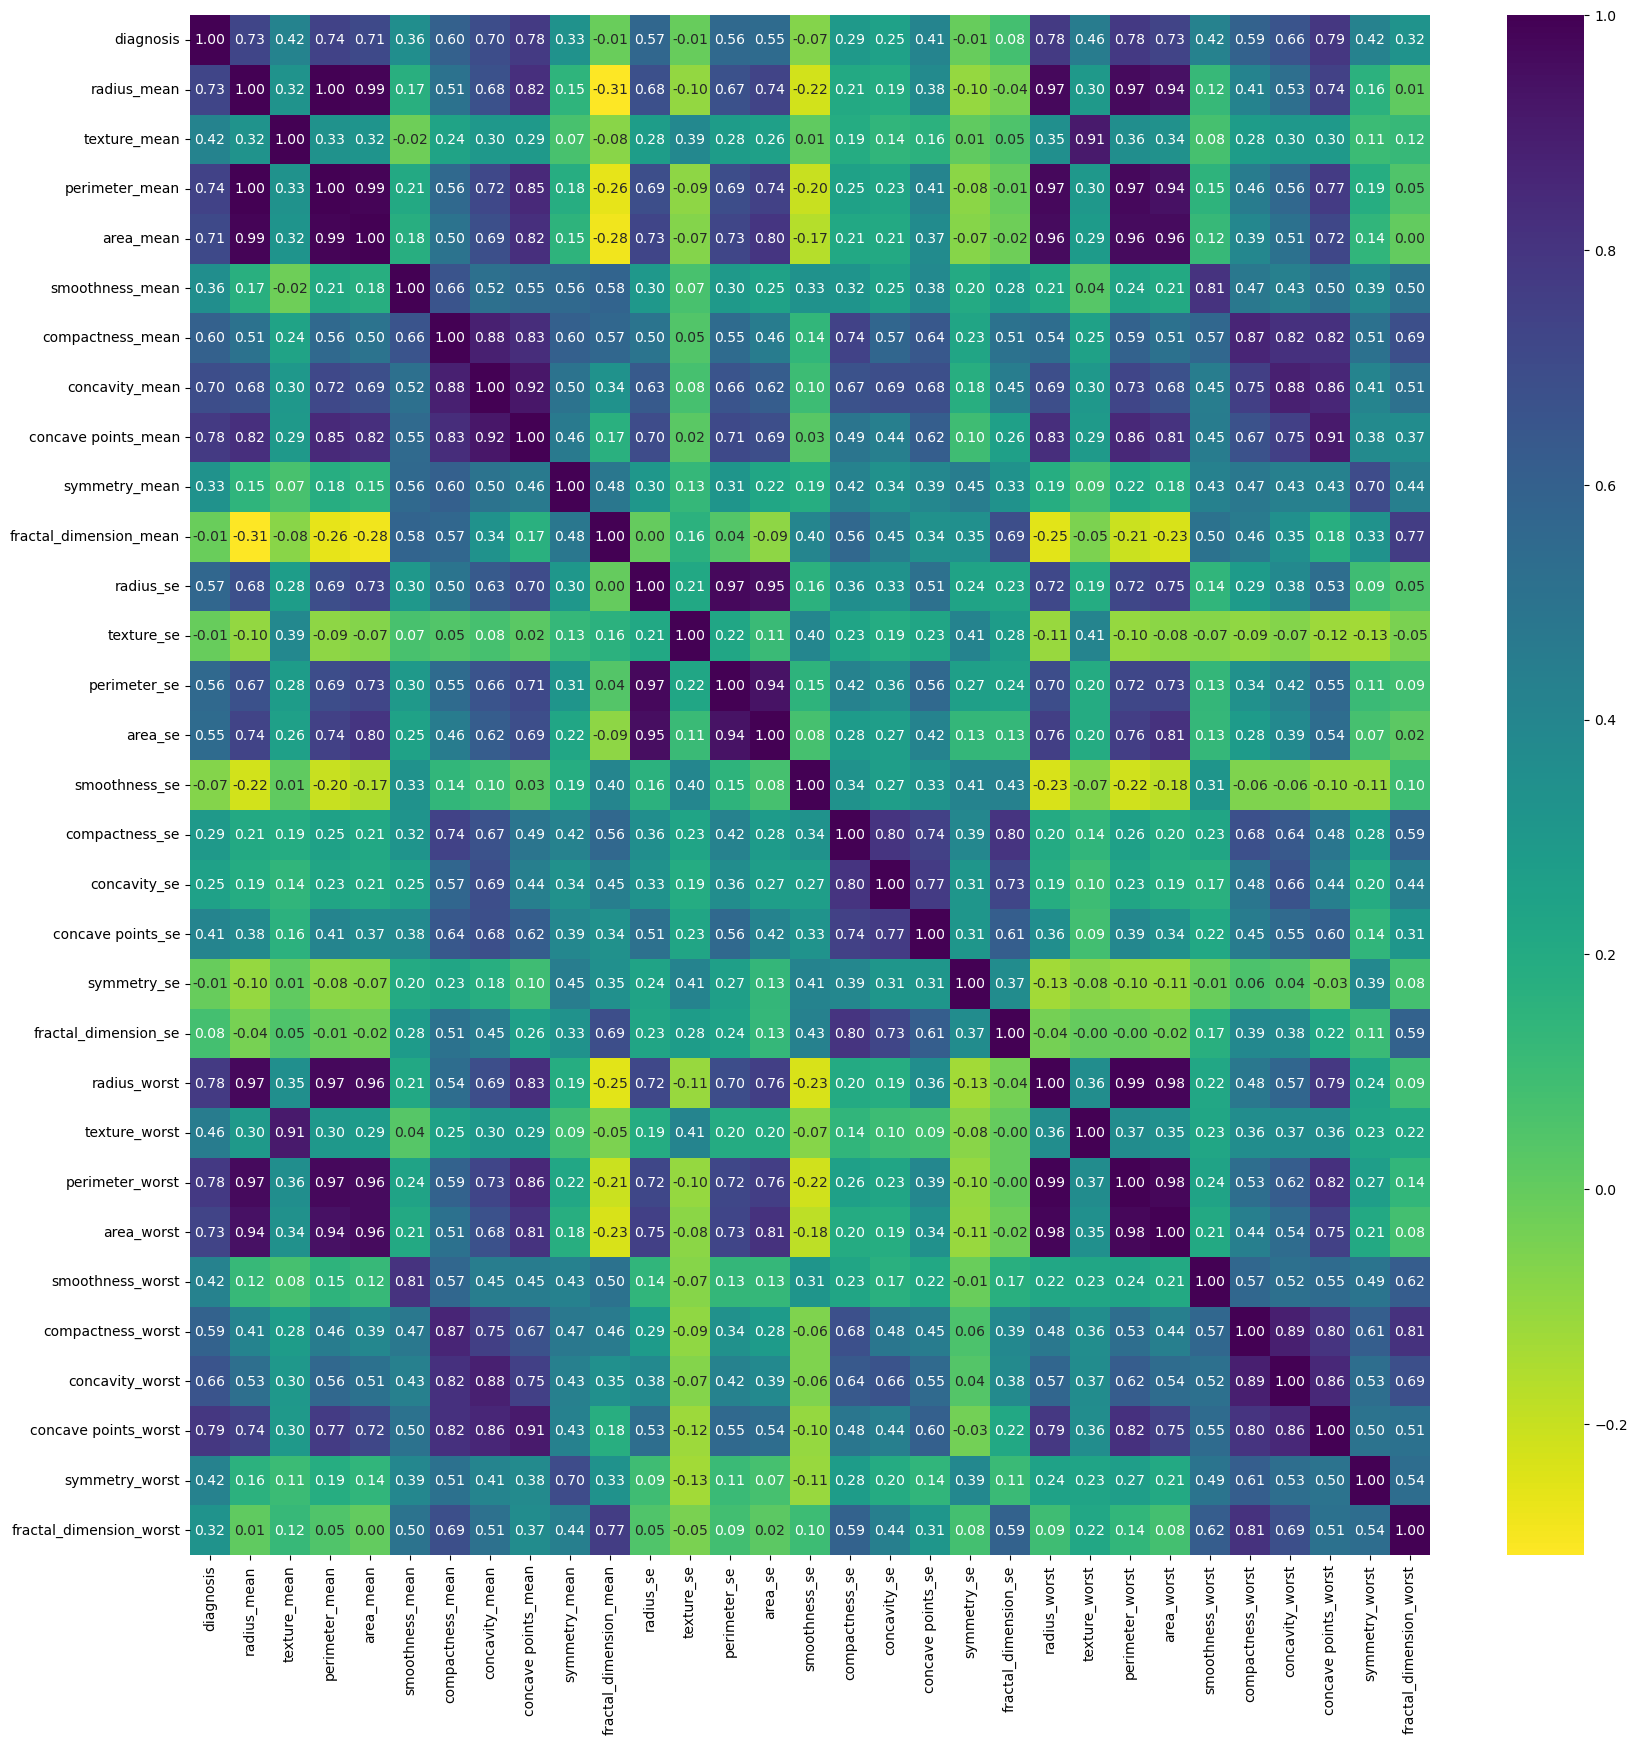

In [25]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='viridis_r', annot=True, fmt = ".2f",annot_kws={'size':10})
plt.show()

In [26]:
#Corelations with tatrget: diagnosis
corr_target = abs(corr['diagnosis'])
#Select features with corelation bigger than 0.2
relevant_features = corr_target[corr_target > 0.2]
names_of_features = [i for i in relevant_features.index]
names_of_features.remove('diagnosis')

# We use only features with correlation > 0.2

In [28]:
X = df[names_of_features]
y = df['diagnosis']

In [29]:
# Spliting data into train and test data
test_size = 0.2
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

## Model evaluation

Make function that will help us to fit, test, evaluate and  add info into dataframe for better visualization

In [32]:
def model_check( name, model, X_train, X_test, y_train, y_test):
    """
    Arguments:
    model: ML model
    X_train, X_test - dataframe
    y_train, y_test - series

    Return:
    Dataframe for evaluating 
    """
    # fit and predict
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    #metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

    #create DataFrame for visualization
    evalation = {'Name' : name,'accuracy': accuracy,'recall': recall,'precision': precision,'f1-score': f1,'balanced accuracy': balanced_accuracy}
    return evalation

### Models without standardization

In [34]:
models = []
models.append(('LR', LogisticRegression(max_iter=10000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))

In [35]:
results = []
for name, model in models:
    result = model_check(name, model, X_train, X_test, y_train, y_test)
    results.append(result)

results_df = pd.DataFrame(results)
results_df

,Name,accuracy,recall,precision,f1-score,balanced accuracy
0,LR,0.964912,0.930233,0.975610,0.952381,0.958074
1,LDA,0.956140,0.906977,0.975000,0.939759,0.946446
2,KNN,0.956140,0.883721,1.000000,0.938272,0.941860
3,CART,0.921053,0.906977,0.886364,0.896552,0.918277
4,NB,0.973684,0.930233,1.000000,0.963855,0.965116
5,SVM,0.947368,0.860465,1.000000,0.925000,0.930233
6,AB,0.964912,0.930233,0.975610,0.952381,0.958074
7,GBM,0.964912,0.930233,0.975610,0.952381,0.958074
8,RF,0.964912,0.930233,0.975610,0.952381,0.958074
9,ET,0.973684,0.953488,0.976190,0.964706,0.969702


### Models with standardization

In [37]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
pipelines.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostClassifier())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingClassifier())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))
pipelines.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesClassifier())])))

In [38]:
results_stand = []
for name, model in pipelines:
    result = model_check(name, model, X_train, X_test, y_train, y_test)
    results_stand.append(result)
    results_stand_df = pd.DataFrame(results_stand)

results_df = pd.concat([results_df, results_stand_df], ignore_index=True)
results_df

,Name,accuracy,recall,precision,f1-score,balanced accuracy
0,LR,0.964912,0.930233,0.975610,0.952381,0.958074
1,LDA,0.956140,0.906977,0.975000,0.939759,0.946446
2,KNN,0.956140,0.883721,1.000000,0.938272,0.941860
3,CART,0.921053,0.906977,0.886364,0.896552,0.918277
4,NB,0.973684,0.930233,1.000000,0.963855,0.965116
5,SVM,0.947368,0.860465,1.000000,0.925000,0.930233
6,AB,0.964912,0.930233,0.975610,0.952381,0.958074
7,GBM,0.964912,0.930233,0.975610,0.952381,0.958074
8,RF,0.964912,0.930233,0.975610,0.952381,0.958074
9,ET,0.973684,0.953488,0.976190,0.964706,0.969702


# Conclusion

In [40]:
accuracy_scale = results_df.sort_values(by='accuracy',ascending=False)[:7][['Name','accuracy']]
accuracy_scale

,Name,accuracy
10,ScaledLR,0.973684
4,NB,0.973684
15,ScaledSVM,0.973684
9,ET,0.973684
19,ScaledET,0.973684
6,AB,0.964912
7,GBM,0.964912


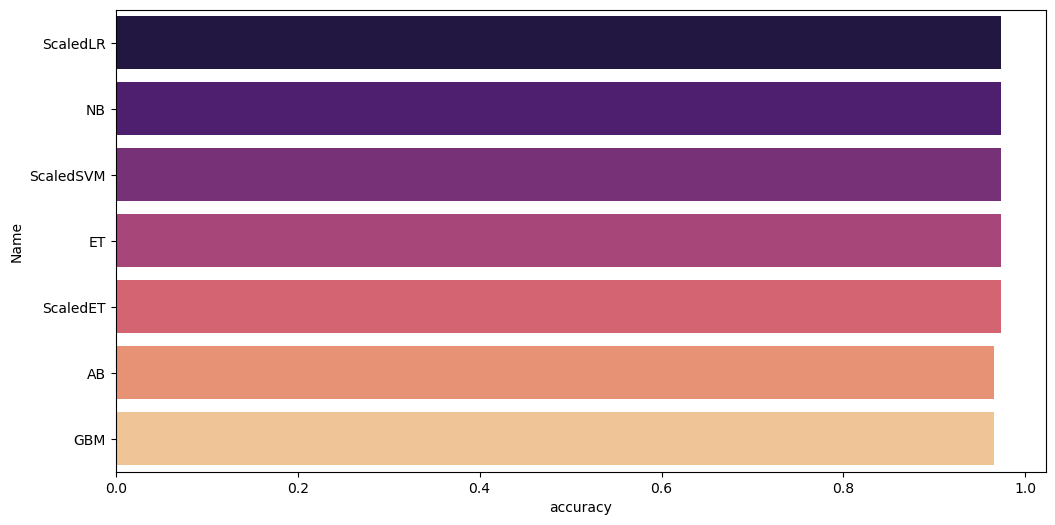

In [104]:
plt.figure(figsize=(12,6))
sns.barplot(x= accuracy_scale['accuracy'] ,y=accuracy_scale['Name'], hue=accuracy_scale['Name'], palette='magma')
plt.show()

--------------------------------------------------------------------------------------------------------------------------------------------------------

There are 4 different models that have the best score for accuracy of *97%*.

But accuracy as a metric isn't really a good aproach here, since we have imbalanced in class.

--------------------------------------------------------------------------------------------------------------------------------------------------------

In [44]:
recall_scale = results_df.sort_values(by='recall',ascending=False)[:7][['Name','recall']]
recall_scale

,Name,recall
10,ScaledLR,0.953488
9,ET,0.953488
15,ScaledSVM,0.953488
12,ScaledKNN,0.953488
19,ScaledET,0.953488
6,AB,0.930233
7,GBM,0.930233


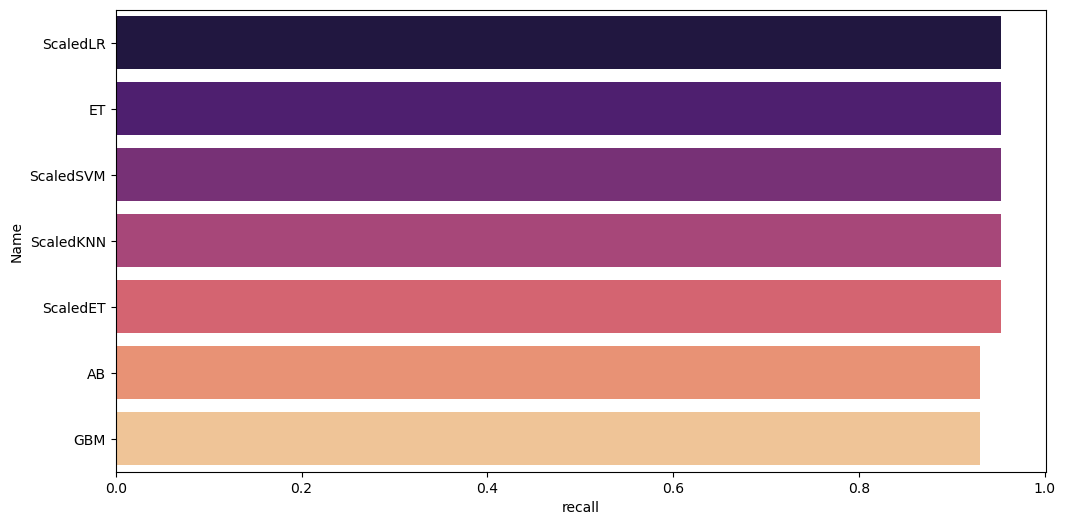

In [109]:
plt.figure(figsize=(12,6))
sns.barplot(x= recall_scale['recall'] ,y=recall_scale['Name'], hue=recall_scale['Name'], palette='magma')
plt.show()

--------------------------------------------------------------------------------------------------------------------------------------------------------

Recall gives a true positive rate, how well model detects 'malignant' samples.

There are 4 different models that have the best score for recall of *95%* and these models are most reliable in catching dangerous cases.

This is crucial in medical diagnosis, where is better to catch all suspicious cases even at the cost of false alarms.

--------------------------------------------------------------------------------------------------------------------------------------------------------

In [126]:
precision_scale = results_df.sort_values(by='precision',ascending=False)[:7][['Name','precision']]
precision_scale

,Name,precision
2,KNN,1.00000
4,NB,1.00000
5,SVM,1.00000
10,ScaledLR,0.97619
9,ET,0.97619
15,ScaledSVM,0.97619
19,ScaledET,0.97619


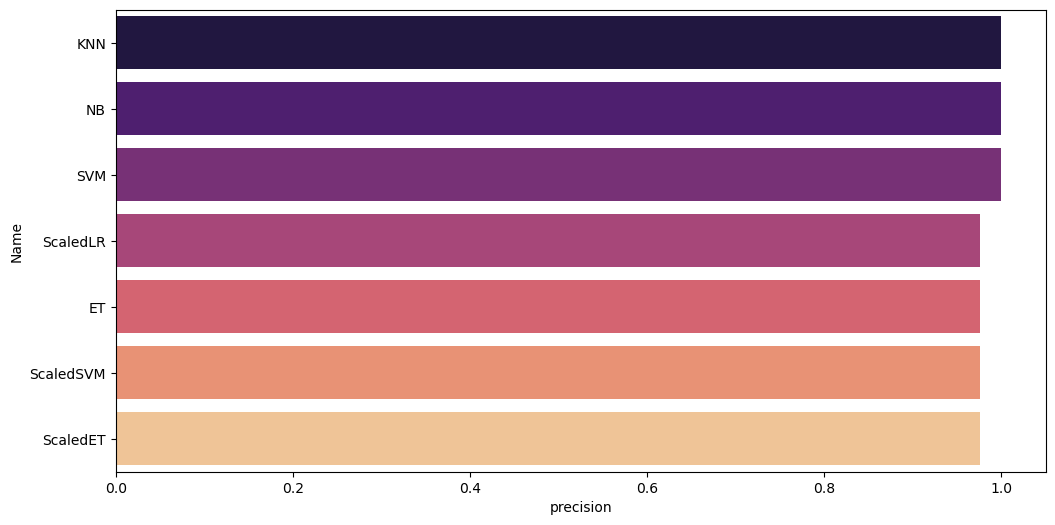

In [128]:
plt.figure(figsize=(12,6))
sns.barplot(x= precision_scale['precision'] ,y=precision_scale['Name'], hue=precision_scale['Name'], palette='magma')
plt.show()

--------------------------------------------------------------------------------------------------------------------------------------------------------

Precision gives percent of how many times the model correctly predicted 'malignant' out of the total predicted 'malignant'.

There are 3 models that have precision of *100%* which means that these models completely avoid false postive cases. When model says it's 'malignant', it can be trusted more.

This is important for cases when false alarms are expensive and stressful for patients.

--------------------------------------------------------------------------------------------------------------------------------------------------------

In [134]:
f1_score_scale = results_df.sort_values(by='f1-score',ascending=False)[:7][['Name','f1-score']]
f1_score_scale

,Name,f1-score
10,ScaledLR,0.964706
9,ET,0.964706
15,ScaledSVM,0.964706
19,ScaledET,0.964706
4,NB,0.963855
12,ScaledKNN,0.953488
6,AB,0.952381


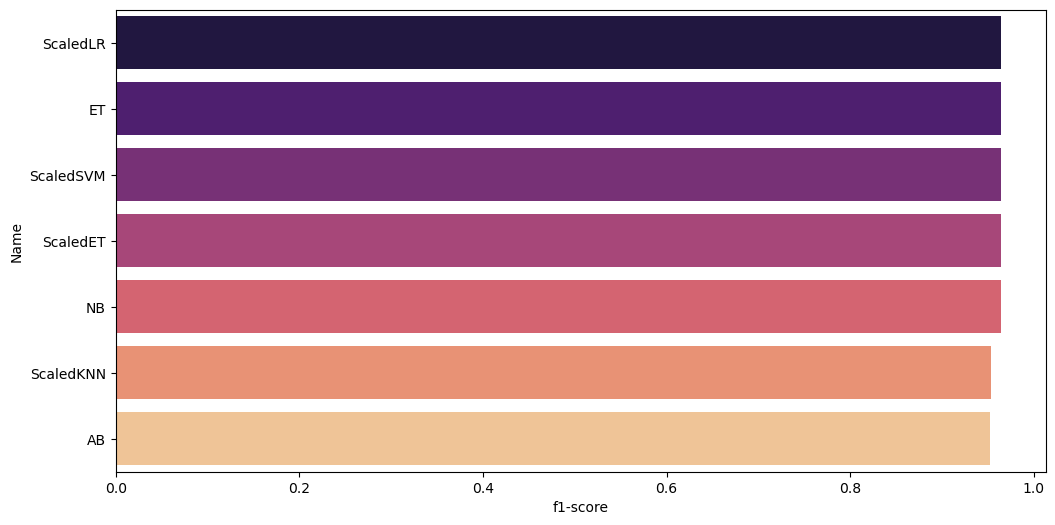

In [136]:
plt.figure(figsize=(12,6))
sns.barplot(x= f1_score_scale['f1-score'] ,y=f1_score_scale['Name'], hue=f1_score_scale['Name'], palette='magma')
plt.show()

--------------------------------------------------------------------------------------------------------------------------------------------------------

F1 score balances recall and precision. 

There are 4 diffrent models that have the best f1 score of *96.5%* and they represent best compromise, they are precise and sensitive.

This score is particularly valuable in classification tasks with unbalanced classes.

--------------------------------------------------------------------------------------------------------------------------------------------------------

In [50]:
balanced_accuracy_scale = results_df.sort_values(by='balanced accuracy',ascending=False)[:7][['Name','balanced accuracy']]
balanced_accuracy_scale

,Name,balanced accuracy
10,ScaledLR,0.969702
9,ET,0.969702
15,ScaledSVM,0.969702
19,ScaledET,0.969702
4,NB,0.965116
12,ScaledKNN,0.962660
6,AB,0.958074


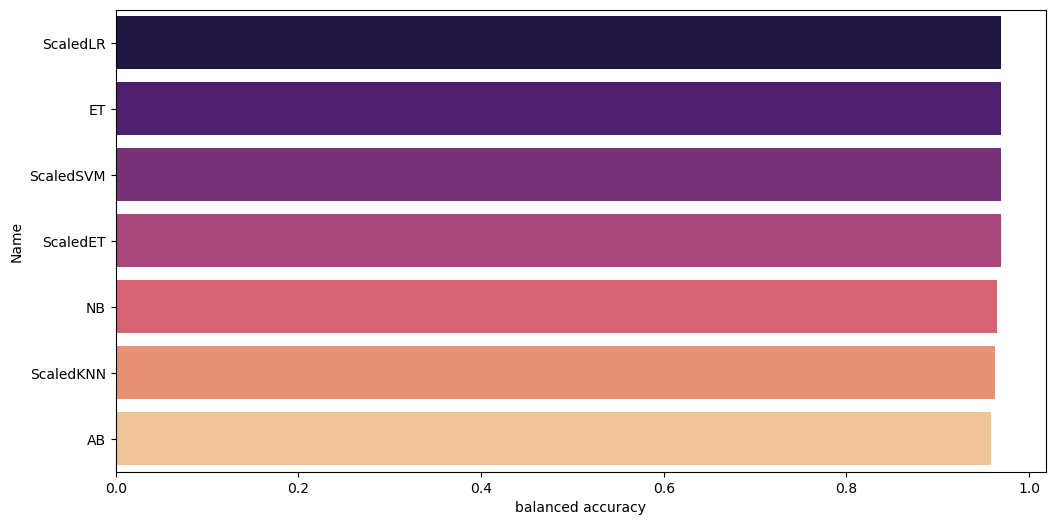

In [143]:
plt.figure(figsize=(12,6))
sns.barplot(x= balanced_accuracy_scale['balanced accuracy'] ,y=balanced_accuracy_scale['Name'], hue=balanced_accuracy_scale['Name'], palette='magma')
plt.show()

--------------------------------------------------------------------------------------------------------------------------------------------------------

Balanced accuracy balances recall and specificity.

There are 4 diffrent models that have balanced accuracy of almost *97%*, they are able to indentify both positive and negative classes equally well.

Balanced accuracy is good to use when there is classification tasks with unbalanced classes.

--------------------------------------------------------------------------------------------------------------------------------------------------------